# 3.2 Random forest


# вопрос

## Отметьте верные утверждения о  Random Forest

Выберите все подходящие ответы из списка

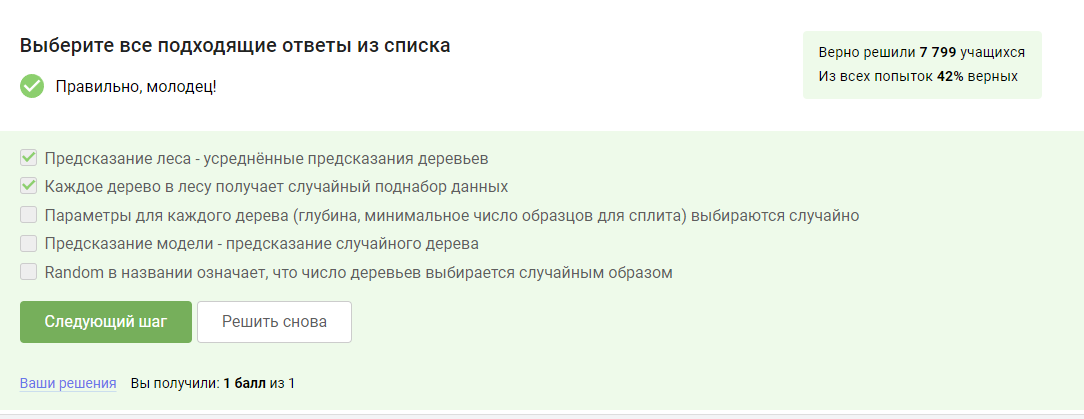

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
# Если кто-то, как и я, потерял код с предобработкой данных с Титаником

titanic_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-kamsarin/Введение_в_Data_Science_и_машинное_обучение/Введение/titanic.csv')

X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

y = titanic_data.Survived

X = pd.get_dummies(X)

X = X.fillna({'Age': X.Age.median()})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [10]:
clf_rf = RandomForestClassifier()
parametrs = {'n_estimators': [10,20,30], 'max_depth': [2,5,7,10]}
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 30}

In [9]:
grid_search_cv_clf

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

# вопрос

##### Разминочная задачка - 
создайте модель RandomForestClassifier с 15 деревьями и максимальной глубиной равной 5 уровням, 

поместите её в переменную rf. 

Обучите модель на данных x_train и y_train, 

предскажите класс для наблюдений в x_test и поместите его в переменную predictions.

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=15, max_depth=5)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)


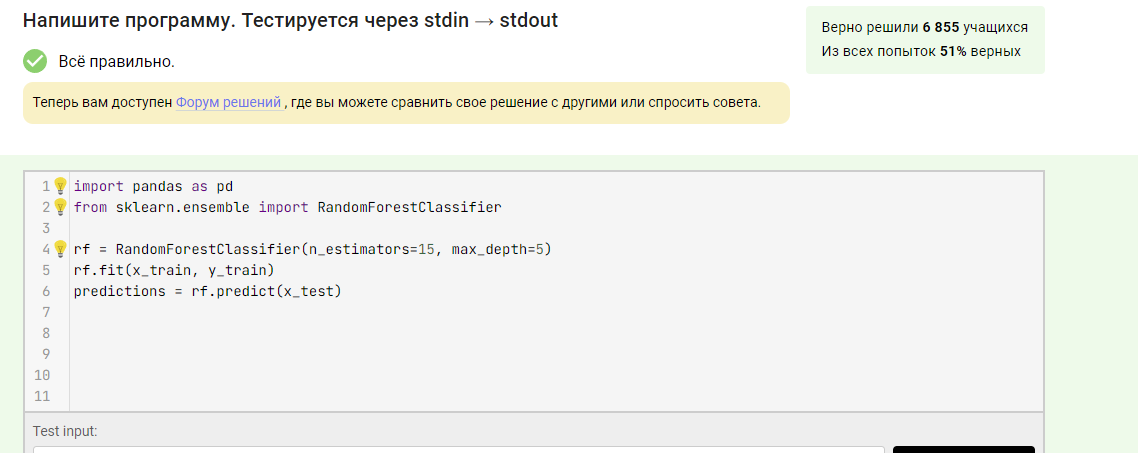

# Продолжаем лекцию

#### В Data Science очень важен подбор параметров и предобработка данных. Для хорошего решения почти любой нетривиальной проблемы нужно понять примерную структуру данных, получить их представление в удобном для использования моделью виде. К первому относится эксплоративный анализ (EDA)
https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15
, а для второго есть feature engineering.

Пример с Decision Tree или Random Forest - допустим, исходные данные выглядят так:



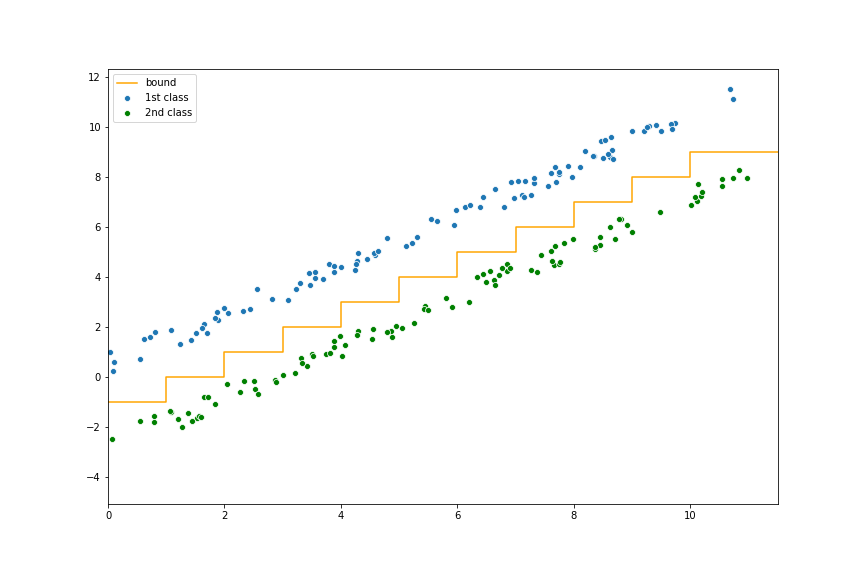

##### Граница, которую проведёт дерево, будет представлять собою ломанную, и деревьям потребуется большая глубина, чтобы разделить данные.  В то же время, если мы просто повернём наши данные на 45 градусов, то получим такую картину:

https://ru.wikipedia.org/wiki/Матрица_поворота

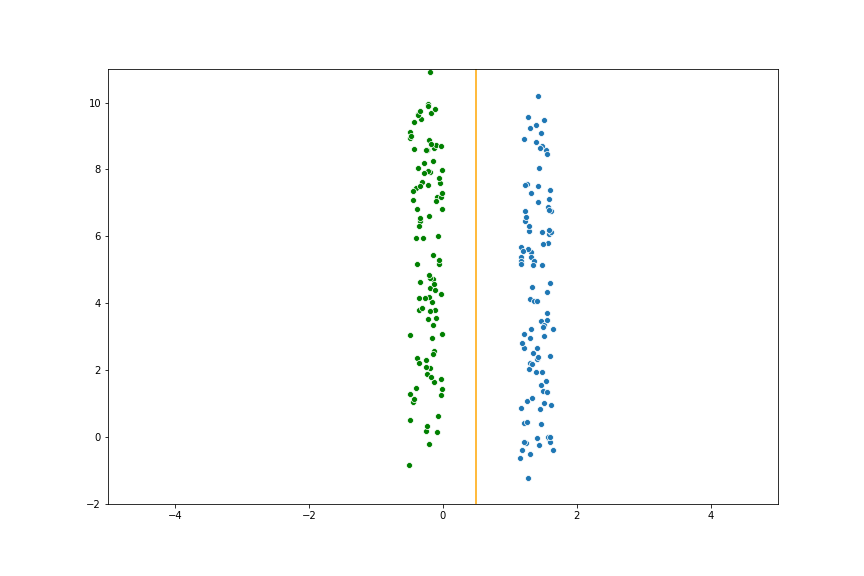

In [12]:
best_clf=grid_search_cv_clf.best_estimator_


In [14]:
best_clf

RandomForestClassifier(max_depth=5, n_estimators=30)

In [15]:
best_clf.score(X_test, y_test)

0.823728813559322

In [16]:
best_clf.feature_importances_

array([0.12992344, 0.11910421, 0.02804207, 0.03644949, 0.12769787,
       0.3240251 , 0.19370243, 0.01720947, 0.00541828, 0.01842764])

###### посмотрим

In [17]:
feature_importances_df = pd.DataFrame({'features':list(X_train.columns), 
                                       'feature_importances':  best_clf.feature_importances_})\
                        .sort_values(by='feature_importances')

In [19]:
feature_importances_df.sort_values(by='feature_importances', ascending=False)

,features,feature_importances
5,Sex_female,0.324025
6,Sex_male,0.193702
0,Pclass,0.129923
4,Fare,0.127698
1,Age,0.119104
3,Parch,0.036449
2,SibSp,0.028042
9,Embarked_S,0.018428
7,Embarked_C,0.017209
8,Embarked_Q,0.005418


In [ ]:
визуализируем

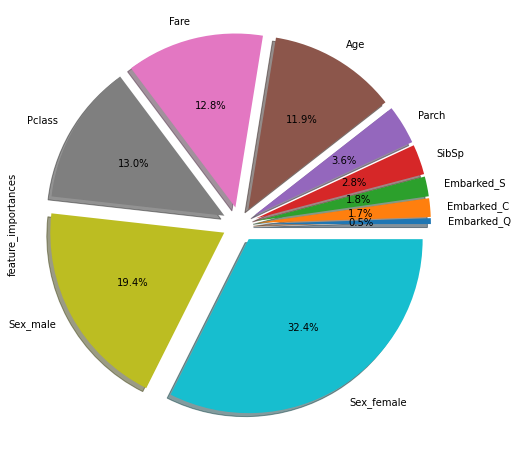

In [20]:


feature_importances_df.plot.pie(
                        explode=[0.1]*len(X_train.columns),
                        labels = feature_importances_df.features,
                        y = 'feature_importances',
                        autopct='%1.1f%%',
                        shadow=True,
                        legend=False,
                        figsize=(8, 8));

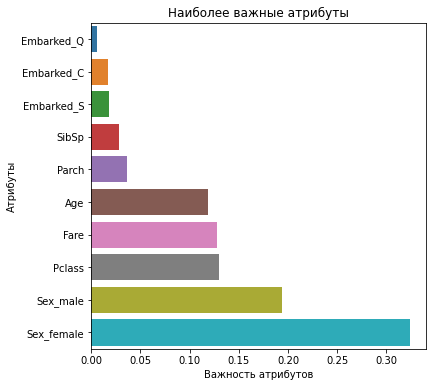

In [21]:
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(y=feature_importances_df.features, x=feature_importances_df.feature_importances)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

##### Предсказания, которые дают модели, это уже хорошо, однако не всегда достаточно. С разными усилиями, мы также можем извлечь важность переменных для осуществления предсказания. Это особенно интересно в науке, где мы пытаемся выявить причинно-следственные связи (хотя, от важности переменных до проверки этих связей ещё длинный путь). Из Decision Tree и Random Forest легко вытащить важность переменных для предсказания, но есть одна особенность. При высокой скореллированности нескольких переменных сплит по любой из них может давать одинаковый Information Gain, и выбор будет сделан случайно. То есть, важность фичей может изменяться в зависимости от выбора из равноценных в процессе обучения. Поэтому следует смотреть на корреляцию между переменными перед обучением, чтобы лучше представлять данные.

# вопрос

##### Воспользуемся данными о сердечных заболеваниях и обучим на них Random Forest. 
https://github.com/sanyathisside/Predicting-Heart-Disease-using-Machine-Learning
Постройте график важности переменных для классификации и выберите среди предложенных вариантов наиболее похожий.

В задании присутствует рандом, прогоните обучение случайного леса и построение графика несколько раз, чтобы увидеть изменения в важности фичей (5 самых важных обычно присутствуют в топе, просто в разном порядке).
Чтобы получить такой же график, как в правильном варианте ответа, сделайте

In [ ]:
# np.random.seed(0)

# rf = RandomForestClassifier(10, max_depth=5)

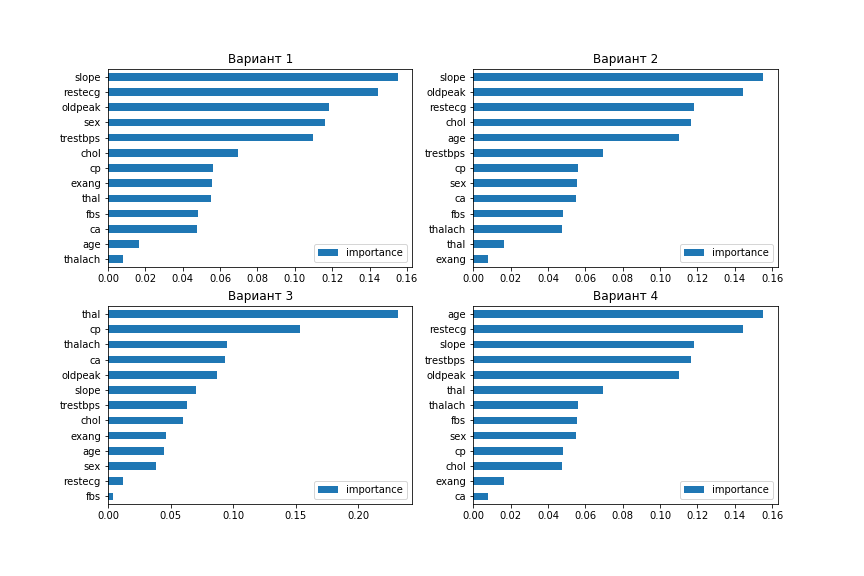

In [ ]:
# Код для отрисовки важности фичей

imp = pd.DataFrame(rf.feature_importances_, index=x_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))
 

In [23]:
data = pd.read_csv('https://raw.githubusercontent.com/sanyathisside/Predicting-Heart-Disease-using-Machine-Learning/master/heart-disease.csv')

In [24]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [25]:
np.random.seed(0)
rf = RandomForestClassifier(10, max_depth=5)

In [27]:
x_train = data.drop('target',axis=1)
y_train = data['target']

In [33]:

rf.fit(x_train, y_train)


RandomForestClassifier(max_depth=5, n_estimators=10)

In [35]:
rf

RandomForestClassifier(max_depth=5, n_estimators=10)

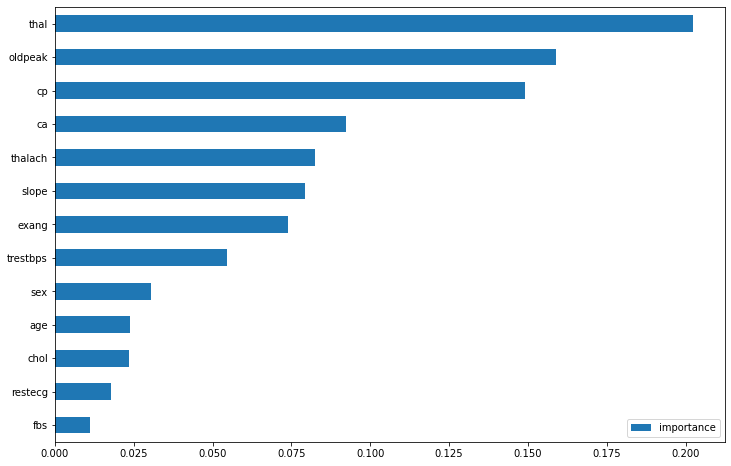

In [34]:
imp = pd.DataFrame(rf.feature_importances_, index=x_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

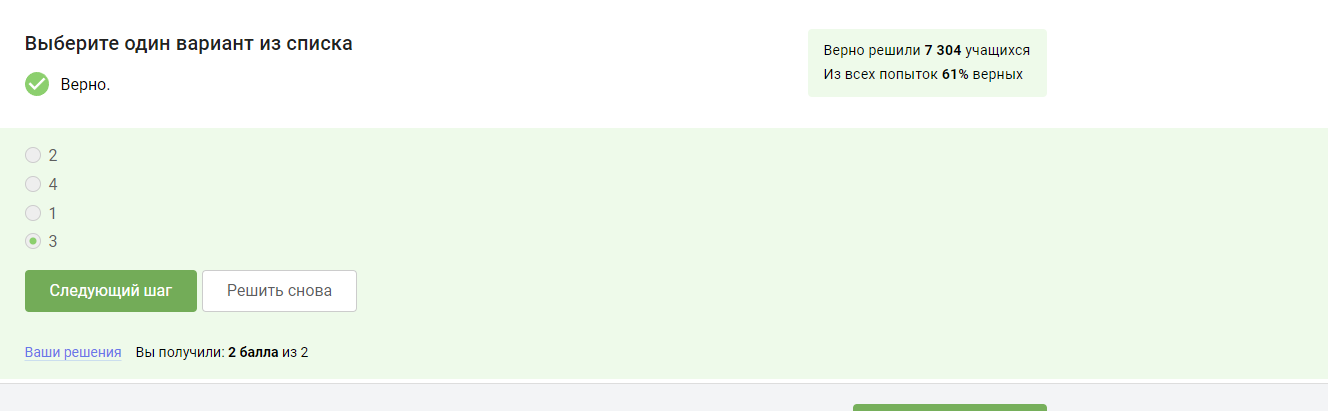

### чужие варианты решений

In [ ]:
# Импортируем необходимые модули
# для работы с данными.
import pandas as pd
import numpy as np
# для построения леса деревьев решений и обучения моделей.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
# для работы с графикой.
import matplotlib.pyplot as plt

# Считываем файл c данными о сердечных заболеваниях.
heart_data = pd.read_csv('datasets_33180_43520_heart.csv')

# Отбросим колонку, которую будем предсказывать.
X = heart_data.drop(['target'], axis=1)
# Создадим переменную, которую будем предсказывать.
y = heart_data.target

# Разбиваем DataFrame на подмножества test и train в пропорции 0.33-test, а остальное - train.
rs = np.random.seed(0)
X_heart_train, X_heart_test, y_heart_train, y_heart_test = train_test_split(X, y, train_size=0.33, random_state=rs)

# Создаем модель RandomForestClassifier.
rf_heart = RandomForestClassifier()

# Задаем параметры модели.
parametrs = {'n_estimators': [10], 'max_depth': [5]}

# Обучение Random forest моделей GridSearchCV на подмножестве train.
GridSearchCV_heart_clf = GridSearchCV(rf_heart, parametrs, cv=5)
GridSearchCV_heart_clf.fit(X_heart_train, y_heart_train)

# Проведем преобразование, позволяющее определить важность переменных.
best_heart_clf = GridSearchCV_heart_clf.best_estimator_

# Создадим атрибут feature_importances_heart и сохраним его в отдельную переменную.
feature_importances_heart = best_heart_clf.feature_importances_

# Создадим DataFrame с информацией о важности переменных.
feature_importances_heart_df = pd.DataFrame({'feature_importances': feature_importances_heart},
                                            index=X_heart_train.columns)\
    .sort_values(by='feature_importances', ascending=True)\
    .rename(columns={'feature_importances': 'importance'})

# Построение графика важности переменных.
feature_importances_heart_df.plot(kind='barh', figsize=(12, 8))
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

heart = pd.read_csv('input/heart.csv')
x = heart.drop('target', axis=1)
y = heart.target

clf = RandomForestClassifier()
params = {
    "n_estimators": [10, 20, 30],
    'max_depth' : range(3, 8),
    'min_samples_split': [2, 6, 10],
    'min_samples_leaf' : [1, 5, 10],
}
search = GridSearchCV(clf, params, cv=5)
search.fit(x, y)
rf = search.best_estimator_

imp = pd.DataFrame(rf.feature_importances_, index=x.columns, columns=['importance'])
print(imp.sort_values('importance', ascending=False).head(5))
